# <center> PRCP-1021-InsCostPred

# Project Introduction

The insurance industry plays a pivotal role in managing financial risks and providing security to individuals and businesses. One of the critical aspects of this industry is accurately estimating insurance costs, which can be influenced by a multitude of factors ranging from demographics to policy coverage. To enhance the efficiency and accuracy of cost estimation, predictive modeling techniques are being increasingly employed. This project aims to develop a sophisticated predictive model for insurance cost estimation, leveraging the power of data science and machine learning.

# Project Background


Traditionally, insurance cost calculations have been based on actuarial tables and historical data. While these methods are informative, they often overlook complex interactions between variables and may not adapt swiftly to changing market dynamics. With the advent of big data and advances in machine learning, insurance companies can now harness the potential of predictive modeling to optimize pricing strategies, mitigate risks, and provide more personalized services to their clients.

## Main Objective :


This Machine learning model developed to predict the insurance price charged to the customer. The charge depends on various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine what health risks the person possesses.


# Load the raw data

This Insurance dataset is taken from : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1021-InsCostPred.zip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
df = pd.read_csv('data/insurance.csv')

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

There are 1338 records in dataset, each record represent the customer data.<br>

*    For each record , the dataset records 7 input variable that stand for both
qualitative and quantitative attributes of the customer, such as age, sex, bmi, children, smoker, region, and charges.<br>
*   There is single continuous output variable that gives the insurance premium charged.

#Data Cleaning

<center><img src='https://miro.medium.com/v2/resize:fit:500/format:webp/1*aDiW2KddpHmTF3uAiibTCQ.png'>

## Clean the dataset

###Deal with missing data

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in dataset.

This is a check for null values, no missing value found. <br>
Moving further to check duplicate data.

###Deal with duplicated data

In [6]:
df.duplicated().sum()

1

Duplicate values found.

Dropping duplicate records.

In [7]:
df.drop_duplicates(inplace=True)

Duplicates has been droped.

Now, We have check for the datatypes for columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


We found that :


*   age,bmi,children,charges are numerical columns.
*   sex,smoker,region are categorical columns.



<h4>Statistical Description of dataset

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Here, None of the numerical columns have zero standard deviation.

> Indented block



**Column insights:**


1.  Age: Minimum is 18 ,Maximum is 64 and Mean is 39.22 .
2.  bmi: Minimum is 15.09 ,Maximum is 53.13 and Mean is 30.66 .
3.  children: Minimum is 0 ,Maximum is 5 and Mean is 1.09 .
4.  charges: Minimum is 1121.87 ,Maximum is 63770.42 and Mean is 13279.12 .



To check for distict count values of each columns of dataset.

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#Exploratory Data Analysis <a id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

<center><img src='https://miro.medium.com/v2/1*Owa2rsDG6Rwv1IM_RdsL3A.gif' width='400' >

##Univariate Analysis

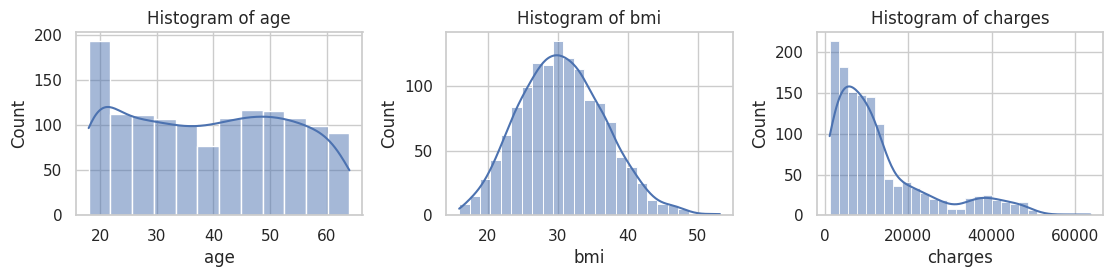

In [11]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ulist = ['age', 'bmi', 'charges']
plot_num = 1
plt.figure(figsize=(15,10))
for i in ulist:
    ax = plt.subplot(4,4,plot_num)
    sns.histplot(df[i], kde=True, color='b')
    plt.title('Histogram of ' + i)
    plot_num +=1
plt.tight_layout()


**Column Insights on basis of histogram :**

1.   Age : In age group 20 their are maximum customers where as age group of 40 has the lowest customers. And the rest of age group has a count value around 100.
2.   BMI : It is a slightly right skewed graph. Where most of the customers have bmi of 25 to 35. Maximum customers are found in bmi group 30.
3.   Charges : It is a rightly skewed graph. most of the customers have the charge value of 1120 to 15000.

##Bivariate Analysis

Text(0.5, 0, 'Smoker')

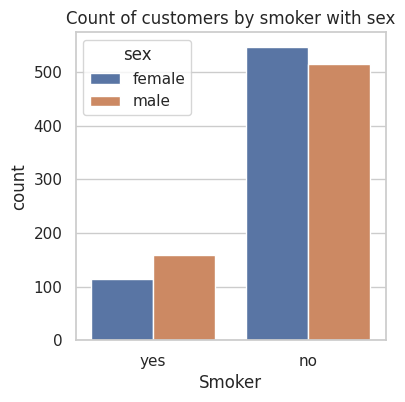

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['smoker'],hue=df.sex)
plt.title('Count of customers by smoker with sex')
plt.xlabel('Smoker')

**Insights:**

Most of the customers do not smoke.<br> As compared to females there are more number of male smokers.

[Text(0.5, 0, 'age')]

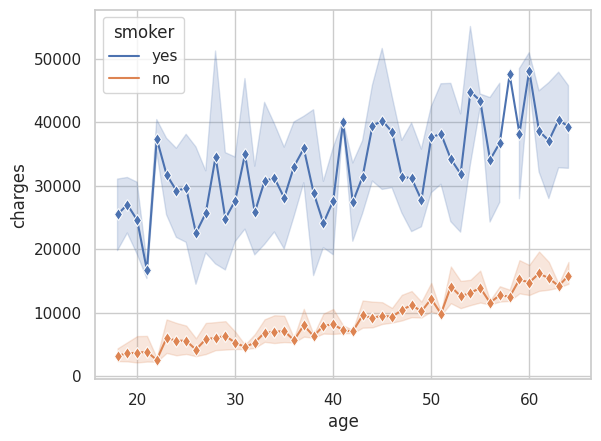

In [13]:
fig = sns.lineplot(x=df.age, y=df.charges, markevery=1, marker='d', data=df, hue=df.smoker)
fig.set(xlabel='age')

**Insights:**

People who smokes are charged a lot higher than non-smokers. <br>
Non-smokers are charged less than 20,000 while smokers are charged more than 15,000.

<Axes: xlabel='charges', ylabel='region'>

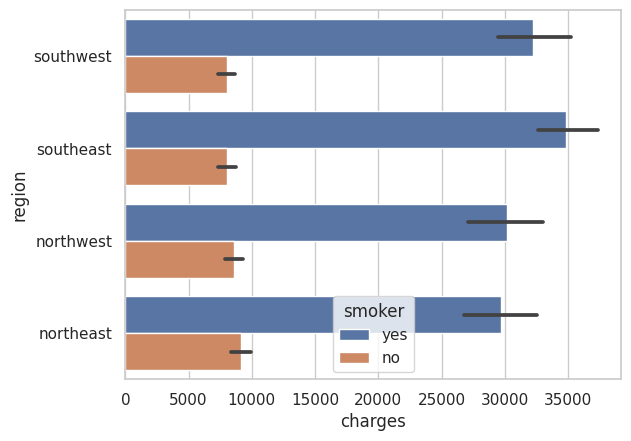

In [14]:
sns.barplot(data=df, x="charges", y="region", hue='smoker')

**Insights:**

Smokers from southeast and non-smokers from northeast are being charged the maximum premium. <br>
Smokers from the northeast and non-smokers from southwest are being charged the least premium.

<Axes: xlabel='charges', ylabel='bmi'>

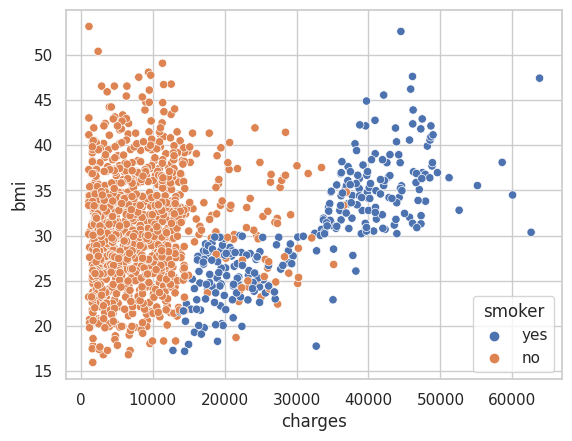

In [15]:
sns.scatterplot(x=df.charges, y=df.bmi, hue=df.smoker)

**Insights:**

Smokers with a bmi of more than 30 are being charged more than 30,000. <br>
Most of the non-smokers are being charged a premium of less than 15,000.

#Data Preprocessing

##Check for outliers

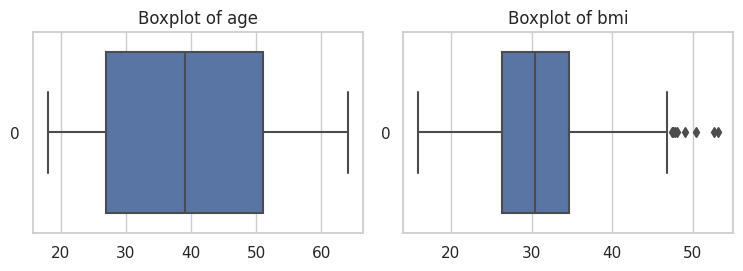

In [16]:
sns.set_theme(style="whitegrid")

ulist = ['age', 'bmi']
plot_num = 1
plt.figure(figsize=(15,10))
for i in ulist:
    ax = plt.subplot(4,4,plot_num)
    sns.boxplot(df[i], orient='h')
    plt.title('Boxplot of ' + i)
    plot_num +=1
plt.tight_layout()

We found outliers in BMI using boxplot. <br>


In [17]:
print(df['bmi'].describe())
print(df['bmi'].median())

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
30.4


We found the outliers after BMI of 46.

As it is a numerical column so we have to replace the outliers with median.

In [18]:
df.loc[df['bmi'] > 46, 'bmi'] = 30.4

ade a copy of dataframe to avoid data loss.

##Label Encoding
It is technique used to convert categorical columns to numeric.

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

#Feature Selection

##Heatmap


<Axes: >

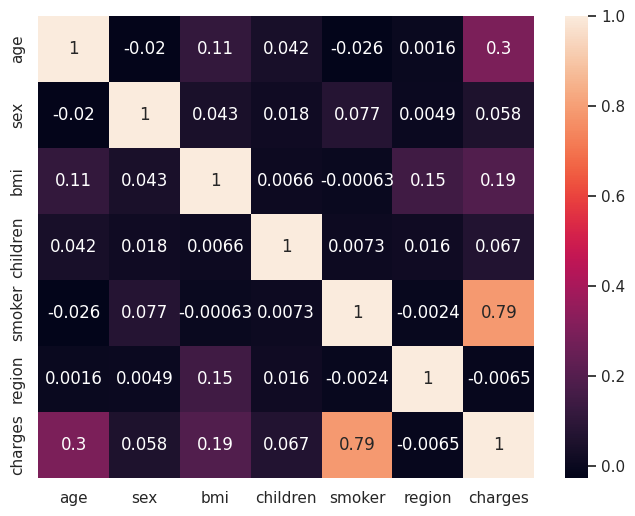

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

Looking at the heatmap values, we don't need to drop any column. <br>
Smoker and charger are highly correlated while smoker and children are least correlated.

##Data Spliting

Spliting the data into training and testing data.

In [23]:
from sklearn.model_selection import train_test_split
x=df.drop('charges', axis=1)
y=df.charges
x_train, x_test, y_train, y_test = train_test_split(x,y)

Using standard scaler to x_train & x_test for data normalization.

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#Model Selection and Building
Finding the best model for the dataset.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr=LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_linear = r2_score(y_test, pred)

print(r2_score(y_test, pred))

6515.4870886305625
0.7005896542828352


In [26]:
from xgboost import XGBRegressor
xgr=XGBRegressor()
xgr.fit(x_train, y_train)
pred = xgr.predict(x_test)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_xgbc = r2_score(y_test, pred)

print(r2_score(y_test, pred))

5425.583822402365
0.7923815326719125


In [27]:
df.shape

(1337, 7)

In [28]:
train_adjusted_r2 = 1-(1-0.8220)*(1337-1)/(1337-7-1)
train_adjusted_r2

0.8210624529721595

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=800, max_features=None, max_leaf_nodes=6,
                      n_estimators=25)
rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_random = r2_score(y_test, pred)
print(r2_score(y_test, pred))

5346.334382782455
0.7984024445742758


In [30]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[100, 200, 300, 400, 500,600,1000,1200],
             'max_depth':[5, 10,20,40,50,60, 70, 100, 200],
             'min_samples_split': [2, 3, 5,7,9, 20, 10, 30, 40],
             'min_samples_leaf': [7,10,12, 20, 40, 50,100]}

reg_rf_gscv = RandomizedSearchCV(estimator=reg_rf, param_distributions=parameters, cv=10, n_jobs=-1,)

reg_rf_gscv.fit(x_train, y_train)
print(reg_rf_gscv.best_estimator_)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=3,
                      n_estimators=1000)


In [31]:
rfr = RandomForestRegressor(max_depth=50,  min_samples_leaf=20,min_samples_split=5,
                      n_estimators=1000)
rfr.fit(x_train, y_train)
pred_random = rfr.predict(x_test)
rmse_random =np.sqrt(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_random = r2_score(y_test, pred)
print(r2_score(y_test, pred))

5346.334382782455
0.7984024445742758


In [32]:
models = ['RandomForestRegressor', 'XGBRegressor' ,'Linear Regression']
r2_score_ = [r2_score_random, r2_score_xgbc,r2_score_linear]

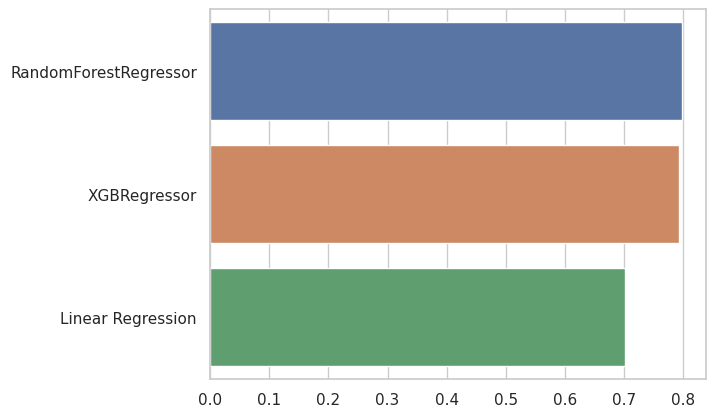

In [33]:
sns.barplot(x=r2_score_, y=models)
sns.set_theme(style="darkgrid")


Random Forest gives us the highest r2 score than XGB & Linear Regression

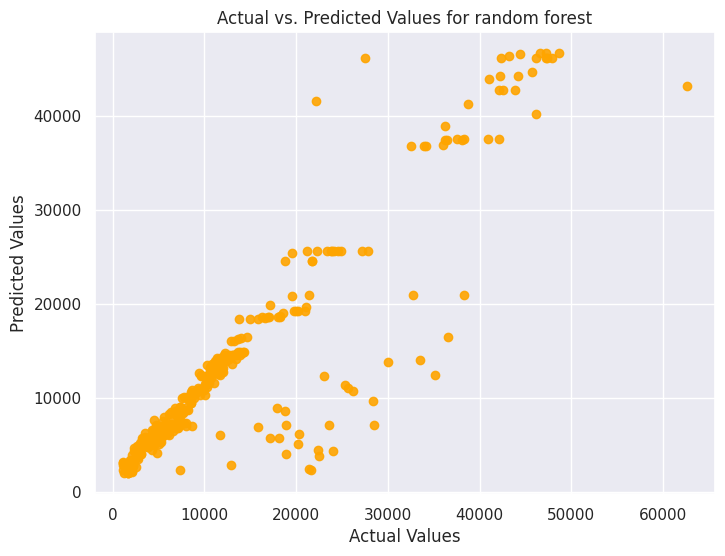

In [34]:
# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_random, alpha=0.9, color='orange')
plt.title("Actual vs. Predicted Values for random forest")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [35]:
dict_new = {'mse_linear':round(rmse_linear, 2), 'mse_xgboost':round(rmse_xgboost, 2), 'mse_random':round(rmse_random, 2), 'r2_score_linear' : round(r2_score_linear, 2),'r2_score_xgboost' : round(r2_score_xgbc, 2), 'r2_score_random':round(r2_score_random, 2)}


In [36]:
score_df = pd.DataFrame([ dict_new.values()], columns=dict_new.keys())

##Model Evaluation

In [37]:
score_df

,mse_linear,mse_xgboost,mse_random,r2_score_linear,r2_score_xgboost,r2_score_random
0,6515.49,5425.58,5346.33,0.7,0.79,0.8


#Conclusion

* In conclusion, the development and implementation of an insurance cost prediction regression model have proven to be a valuable asset in the realm of risk assessment and financial planning for insurance companies. Through the utilization of historical data, comprehensive features, and advanced machine learning techniques, this model has demonstrated its ability to provide accurate and reliable estimates of insurance premiums.

* One of the primary advantages of this model is its capacity to enhance decision-making processes within insurance organizations. By providing insurers with a data-driven foundation for setting premiums, underwriting policies, and managing risk portfolios, it enables them to optimize their pricing strategies and improve overall profitability. This model can also contribute to a fairer and more equitable insurance market by ensuring that policyholders are charged premiums that accurately reflect their risk profiles.

* In conclusion, the insurance cost prediction regression model stands as a powerful tool in the insurance industry, offering the promise of improved risk management, fairer pricing, and greater customer satisfaction. As it continues to evolve and adapt to changing conditions, it will play a pivotal role in shaping the future of the insurance sector.